# Data Preprocessing

In [1621]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1622]:
# Importing the dataset
df = pd.read_csv('data_di.csv', sep=',', parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [1623]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [1624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Заменяю знак "?" на идентификатор пропущенного значения.

In [1625]:
df = df.replace('?',np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Делаю проверку на количество уникальных значений по переменным

In [1626]:
df.apply(lambda x: len(x.unique()))
#df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Удаляю переменные, которые сожержат большое кол-во уникальныз значений и являются неинформативными.

In [1627]:
df = df.drop(['insured_zip','policy_number','incident_location','policy_bind_date','incident_date'], axis='columns', inplace=False)
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [1628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [1629]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178
fraud_reported,0,0.000
insured_education_level,0,0.000
capital-loss,0,0.000
capital-gains,0,0.000
insured_relationship,0,0.000
insured_hobbies,0,0.000
insured_occupation,0,0.000


Произвожу замену пропущенных значений по переменным. Для 'property_damage' и 'police_report_available' отсутствие данных можно заменить значением "NO". 

In [1630]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [1631]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [1632]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [1633]:
df['property_damage'].fillna('NO', inplace = True)

In [1634]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [1635]:
df['police_report_available'].fillna('NO', inplace = True)

In [1636]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Для 'collision_type' я решаю для пропущенных данных создать отдельное значение "Unknown"?, а не заменять наиболее частым.

In [1637]:
df['collision_type'].fillna('Unknown', inplace = True)

In [1638]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: collision_type, dtype: int64

In [1639]:
# Re-Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
fraud_reported,0,0.0
insured_education_level,0,0.0
incident_type,0,0.0
capital-loss,0,0.0
capital-gains,0,0.0
insured_relationship,0,0.0
insured_hobbies,0,0.0
insured_occupation,0,0.0
insured_sex,0,0.0
auto_year,0,0.0


Вместо переменной 'auto_year', указывающей на год автомобиля, создаю 'auto_age', которая будет указывать на количество лет авто.

In [1641]:
df['auto_age'] = 2015 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['auto_age'].head()

0    11
1     8
2     8
3     1
4     6
Name: auto_age, dtype: int64

In [1642]:
# Features distribution
#import seaborn as sns
#sns.set()
#sns.pairplot(df, size = 4.5)
#plt.show();

In [1643]:
# Log Transformations for Skewed Distributions
#df[[]] = np.log(df[[]])

#import seaborn as sns
#sns.set()
#sns.pairplot(df)

In [1644]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [1645]:
# Outliers
df = outliers(df)
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,auto_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.476176,1.091898e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7397.773749,37928.950000,2005.103000,9.897000
std,115.113174,9.140287,611.864673,243.570287,2.266996e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4818.993582,18886.252893,6.015861,6.015861
min,0.000000,19.000000,500.000000,523.903965,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,15.000000
max,479.000000,64.000000,2000.000000,1987.807651,7.993220e+06,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,21873.748536,79560.000000,2015.000000,20.000000


In [1646]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,auto_age
0,328,48,OH,250/500,1000,1406.91,0.0,MALE,MD,craft-repair,...,YES,71610,6510,13020.0,52080,Saab,92x,2004,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000.0,MALE,MD,machine-op-inspct,...,NO,5070,780,780.0,3510,Mercedes,E400,2007,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000.0,FEMALE,PhD,sales,...,NO,34650,7700,3850.0,23100,Dodge,RAM,2007,N,8
3,256,41,IL,250/500,2000,1415.74,6000000.0,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000.0,MALE,Associate,sales,...,NO,6500,1300,650.0,4550,Accura,RSX,2009,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0.0,FEMALE,Masters,craft-repair,...,NO,87200,17440,8720.0,61040,Honda,Accord,2006,N,9
996,285,41,IL,100/300,1000,1436.79,0.0,FEMALE,PhD,prof-specialty,...,NO,108480,18080,18080.0,72320,Volkswagen,Passat,2015,N,0
997,130,34,OH,250/500,500,1383.49,3000000.0,FEMALE,Masters,armed-forces,...,YES,67500,7500,7500.0,52500,Suburu,Impreza,1996,N,19
998,458,62,IL,500/1000,2000,1356.92,5000000.0,MALE,Associate,handlers-cleaners,...,YES,46980,5220,5220.0,36540,Audi,A5,1998,N,17


In [1647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   float64
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [1648]:
# Cheking categorical data
dfs = df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
          'insured_hobbies','insured_relationship','incident_type','collision_type',
          'incident_severity','authorities_contacted','incident_state','incident_city','property_damage',
          'police_report_available','auto_make','auto_model','fraud_reported']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
13,property_damage,2,"[YES, NO]",object
0,policy_state,3,"[OH, IN, IL]",object
1,policy_csl,3,"[250/500, 100/300, 500/1000]",object
14,police_report_available,2,"[YES, NO]",object
2,insured_sex,2,"[MALE, FEMALE]",object
6,insured_relationship,6,"[husband, other-relative, own-child, unmarried...",object
4,insured_occupation,14,"[craft-repair, machine-op-inspct, sales, armed...",object
5,insured_hobbies,20,"[sleeping, reading, board-games, bungie-jumpin...",object
3,insured_education_level,7,"[MD, PhD, Associate, Masters, High School, Col...",object
7,incident_type,4,"[Single Vehicle Collision, Vehicle Theft, Mult...",object


Кодирую категориальные переменные с помощью среднего целевого значения. Изначально делала это простым способом, но в таком случае значимыми переменными в базовой модели являются всего 2,точность не намного, но ниже 

In [1649]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [1650]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [1651]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [1652]:
df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.76,0.74))
df['property_damage'].value_counts()

0.76    698
0.74    302
Name: property_damage, dtype: int64

In [1653]:
df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [1654]:
df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [1655]:
df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [1656]:
df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.737))

In [1657]:
df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [1658]:
df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.74,0.77))

In [1659]:
df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [1660]:
df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.77,0.74))

In [1661]:
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [1662]:
df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.786,0.76,0.74,0.73,0.706))

In [1663]:
df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [1664]:
df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.83, 0.83,0.83, 0.796,0.788,0.77,0.76,0.75,0.72,0.717,
                                                          0.708,0.70,0.698,0.63))

In [1665]:
df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [1666]:
df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.907,
                0.89, 0.88,0.84,0.836,0.82,0.807,0.805,0.80,0.78,0.77,0.769,0.73,0.73,0.72,0.708,0.698,0.26,0.17))

In [1667]:
df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [1668]:
df['insured_education_level'] = df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.776,0.77,0.766,0.74,0.737,0.736,0.736))

In [1669]:
df[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [1670]:
df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.73,0.71))

In [1671]:
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [1672]:
df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.78,0.77,0.73,0.705,0.69,0.565))


In [1673]:
df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [1674]:
df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.93,0.89,0.87,0.39))

In [1675]:
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [1676]:
df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.778,0.776,0.765,0.757,0.75,0.74,0.71))

In [1677]:
df[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
3,Unknown,0.910112
2,Side Collision,0.746377
0,Front Collision,0.724409
1,Rear Collision,0.688356


In [1678]:
df['collision_type'] = df['collision_type'].replace(('Unknown','Side Collision', 'Front Collision','Rear Collision'),
                                                        (0.91,0.746,0.724,0.688))

In [1679]:
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [1680]:
df['auto_model'] = df['auto_model'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E400',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [1681]:
df['auto_model'].value_counts()

0.710    112
0.720     55
0.800     45
0.700     44
0.670     43
0.880     42
0.850     40
0.830     37
0.730     37
0.780     36
0.650     32
0.840     32
0.870     31
0.900     30
0.855     28
0.810     27
0.630     27
0.740     27
0.760     25
0.750     24
0.620     24
0.690     23
0.860     23
0.640     22
0.590     22
0.600     20
0.610     18
0.950     18
0.560     16
0.660     15
0.770     13
0.910     12
Name: auto_model, dtype: int64

In [1682]:
df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [1683]:
df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.775,0.76,0.75,0.745,0.72,0.72,0.72,0.695,0.694,0.66))

In [1684]:
df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [1685]:
df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.93,0.79,0.73,0.71,0.68))

Записываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляю 'auto_age'.

In [1686]:
df['auto_year'] = df['auto_age']

In [1687]:
df = df.drop(['auto_age'], axis='columns', inplace=False)

In [1688]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,0.740,0.737,1000,1406.91,0.0,0.74,0.736,0.700,...,2,0.77,71610,6510,13020.0,52080,0.775,0.71,11,0
1,228,42,0.745,0.737,2000,1197.22,5000000.0,0.74,0.736,0.760,...,0,0.74,5070,780,780.0,3510,0.660,0.74,8,0
2,134,29,0.740,0.740,2000,1413.14,5000000.0,0.77,0.736,0.720,...,3,0.74,34650,7700,3850.0,23100,0.750,0.67,8,1
3,256,41,0.770,0.737,2000,1415.74,6000000.0,0.77,0.736,0.750,...,2,0.74,63400,6340,6340.0,50720,0.720,0.62,1,0
4,228,44,0.770,0.780,1000,1583.91,6000000.0,0.74,0.766,0.720,...,1,0.74,6500,1300,650.0,4550,0.800,0.91,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.740,0.780,1000,1310.80,0.0,0.77,0.776,0.700,...,1,0.74,87200,17440,8720.0,61040,0.745,0.77,9,1
996,285,41,0.770,0.740,1000,1436.79,0.0,0.77,0.736,0.788,...,3,0.74,108480,18080,18080.0,72320,0.720,0.72,0,1
997,130,34,0.740,0.737,500,1383.49,3000000.0,0.77,0.776,0.750,...,3,0.77,67500,7500,7500.0,52500,0.760,0.70,19,1
998,458,62,0.770,0.780,2000,1356.92,5000000.0,0.74,0.766,0.796,...,1,0.77,46980,5220,5220.0,36540,0.695,0.65,17,1


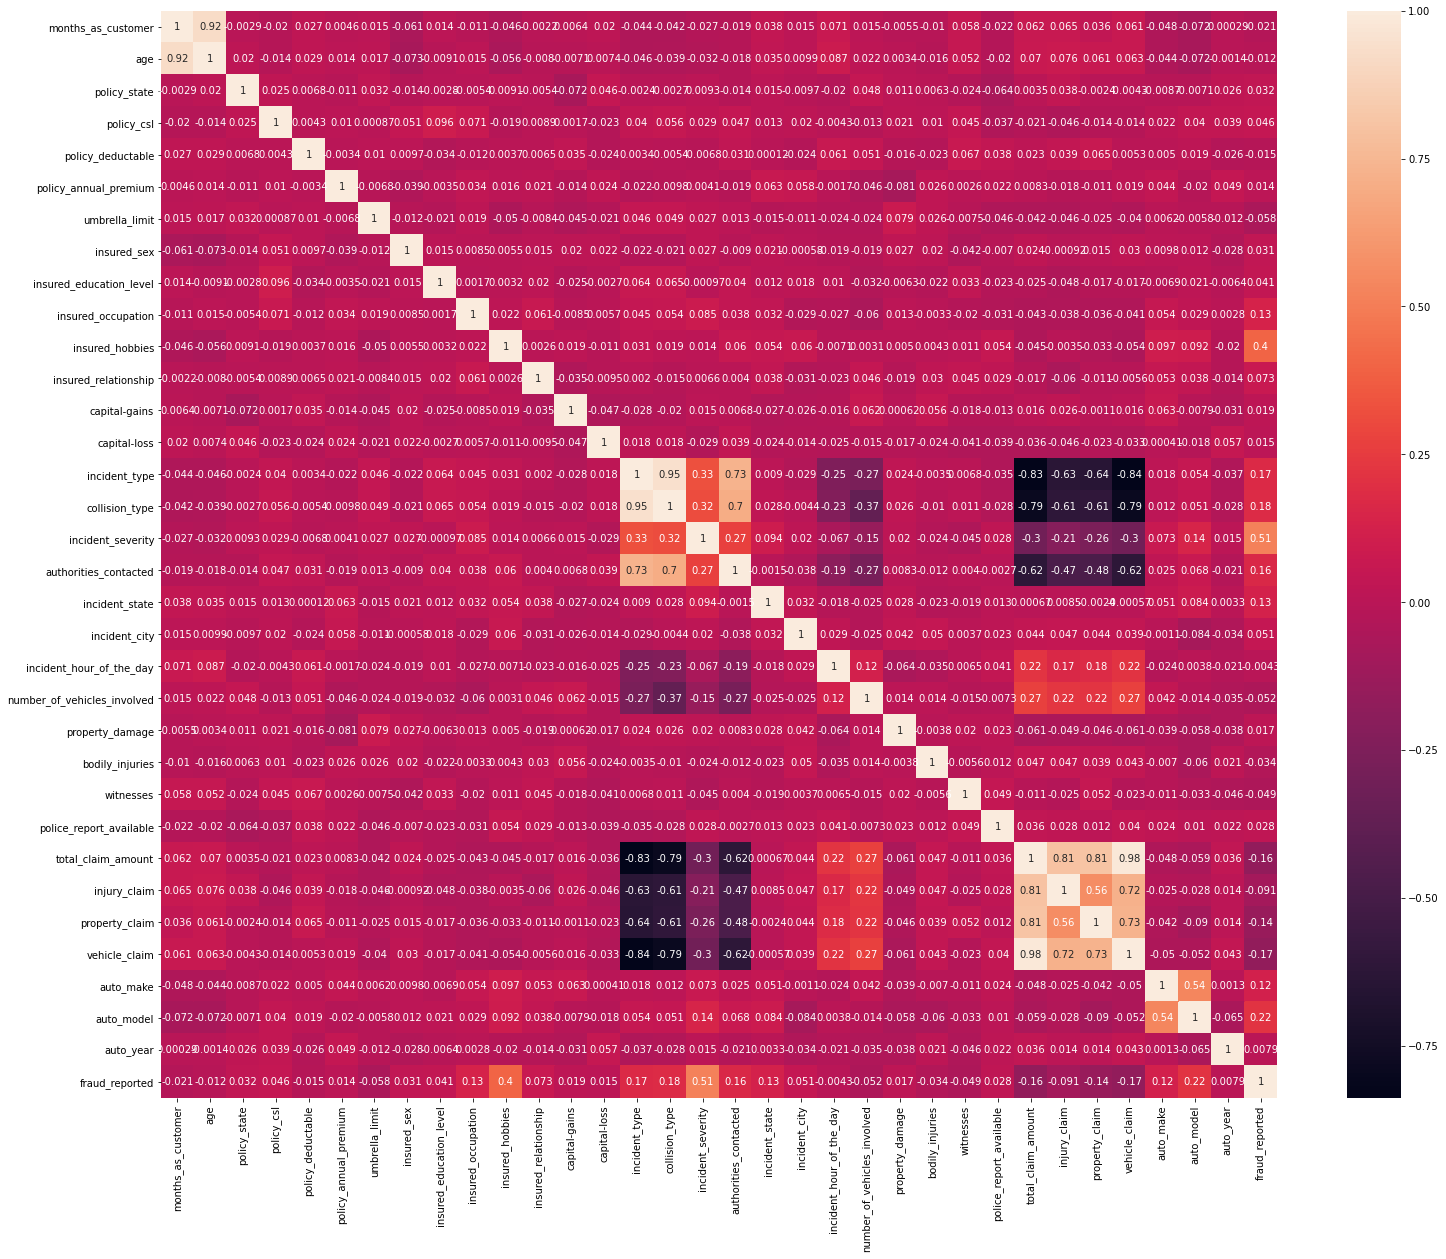

In [1213]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [1214]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [1215]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression

Логистическая регрессия от всех переменных:

In [1216]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [1217]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.865

In [1218]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 27  17]
 [ 10 146]]


10 позитивных случаев распознаны как негативные, 17 негативных распознаны как позитивные.

In [1242]:
Error_rate = (17+10)/(200)
Error_rate

0.135

In [1243]:
Se = 146/(146+10)
Se

0.9358974358974359

In [1244]:
Sp = 27/(27+17)
Sp

0.6136363636363636

# Logistic Regression2
на отобранных переменных

In [1219]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.485421
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.143     
Dependent Variable: y                AIC:              842.6742  
Date:               2021-11-05 19:07 BIC:              997.2663  
No. Observations:   800              Log-Likelihood:   -388.34   
Df Model:           32               LL-Null:          -453.13   
Df Residuals:       767              LLR p-value:      1.0659e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
x1       -0.0811     0.2438   -0.3328   0.7393    -0.5590    0.3968
x2        0.1700     0.2432    0.6993   0.4844    -0.3065 

In [1220]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

8
[False  True False False False False False False False  True  True  True
 False False  True  True  True False False False False False False False
 False False False False False False False  True False]
[ 2  1 17 10 18 11  4 26 13  1  1  1 12 16  1  1  1 20  3  8 21  5 24 15
  7 23 19  6 14 25  9  1 22]


In [1221]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[1, 9, 10, 11, 14, 15, 16, 31]
№	Index	Feature
0	1	age
1	9	insured_occupation
2	10	insured_hobbies
3	11	insured_relationship
4	14	incident_type
5	15	collision_type
6	16	incident_severity
7	31	auto_model


In [1260]:
# p-value < 3% Features
bas_X_train = X_train[:,[9,10,11,14,15,16,31]]
bas_X_test = X_test[:,[9,10,11,14,15,16,31]]

In [1261]:
#import pickle
#obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
#output = open('data_7f.pkl', 'wb')
#pickle.dump(obj, output, 2)
#output.close()

In [1262]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
bas = LogisticRegression(random_state = 13).fit(bas_X_train, y_train)

In [1263]:
# Predicting the Test set results
y_bas_pred = bas.predict(bas_X_test)
bas.score(bas_X_test,y_test)

0.865

In [1264]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bas_pred)
print(cm)

[[ 28  16]
 [ 11 145]]


In [1265]:
Error_rate = (16+11)/(200)
Error_rate

0.135

In [1266]:
Se = 145/(145+11)
Se

0.9294871794871795

In [1267]:
Sp = 28/(28+16)
Sp

0.6363636363636364

# SVM

In [1278]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 10).fit(bas_X_train, y_train)

In [1279]:
# Predicting the Test set results
svm_pred = svm.predict(bas_X_test)
svm.score(bas_X_test,y_test)

0.9

In [1280]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[ 38   6]
 [ 14 142]]


In [1281]:
Error_rate = (14+6)/(200)
Error_rate

0.1

In [1282]:
Se = 142/(142+14)
Se

0.9102564102564102

In [1283]:
Sp = 38/(38+14)
Sp

0.7307692307692307

# K-Nearest Neighbors

Minimum error:- 0.1 at K = 21


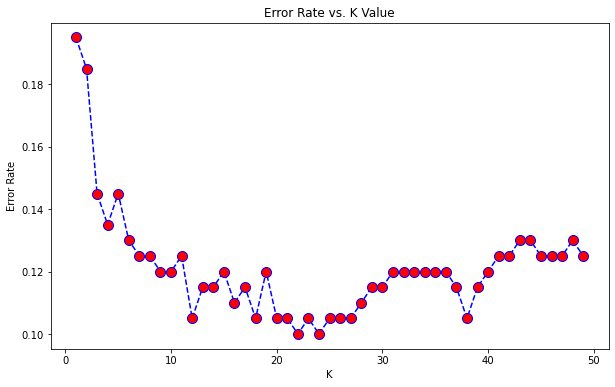

In [1288]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(bas_X_train,y_train)
     pred_i = knn.predict(bas_X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [1289]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 21, metric = 'minkowski', p = 2).fit(bas_X_train, y_train)

In [1290]:
# Predicting the Test set results
knn_pred = knn.predict(bas_X_test)
knn.score(bas_X_test,y_test).round(2)

0.9

In [1291]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[ 32  12]
 [  9 147]]


In [1292]:
Error_rate = (12+9)/(200)
Error_rate

0.105

In [1293]:
Se = 147/(147+9)
Se

0.9423076923076923

In [1294]:
Sp = 32/(32+12)
Sp

0.7272727272727273

# Naive Bayes

In [1299]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(bas_X_train, y_train)

In [1300]:
# Predicting the Test set results
nb_pred = nb.predict(bas_X_test)
nb.score(bas_X_test,y_test)

0.905

In [1301]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
print(cm)

[[ 39   5]
 [ 14 142]]


In [1302]:
Error_rate = (5+14)/(200)
Error_rate

0.095

In [1303]:
Se = 142/(142+14)
Se

0.9102564102564102

In [1304]:
Sp = 39/(39+5)
Sp

0.8863636363636364

# Classification Tree

In [1324]:
# Function Max Leaf
def max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

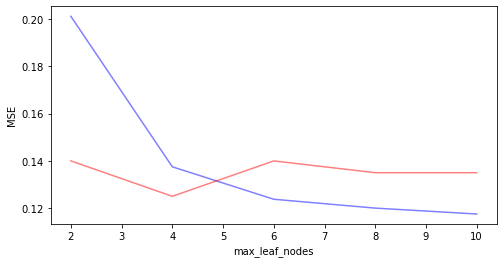

In [1325]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [1342]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(bas_X_train, y_train)

In [1343]:
# Predicting the Test set results
ct_pred = ct.predict(bas_X_test)
ct.score(bas_X_test,y_test)

0.895

In [1344]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[ 39   5]
 [ 16 140]]


In [1453]:
Error_rate = (5+16)/(200)
Error_rate

0.105

In [1454]:
Se = 140/(140+16)
Se

0.8974358974358975

In [1455]:
Sp = 39/(39+5)
Sp

0.8863636363636364

# Forest

In [1425]:
def rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

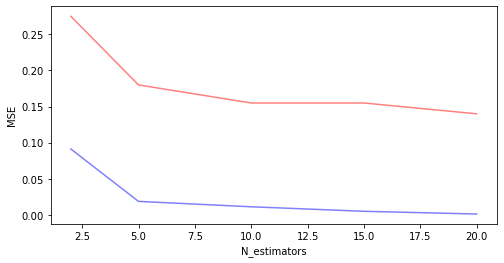

In [1426]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [1448]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=8, max_leaf_nodes =i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

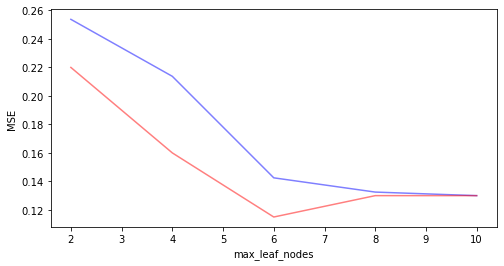

In [1449]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [1450]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 8, max_leaf_nodes = 6, random_state = 10).fit(bas_X_train, y_train)

In [1451]:
# Predicting the Test set results
rf_pred = rf.predict(bas_X_test)
rf_pred = (rf_pred > 0.5)
rf.score(bas_X_test,y_test)

0.885

In [1452]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[ 29  15]
 [  8 148]]


In [1456]:
Error_rate = (15+8)/(200)
Error_rate

0.115

In [1457]:
Se = 148/(148+8)
Se

0.9487179487179487

In [1458]:
Sp = 29/(29+15)
Sp

0.6590909090909091

# Classification Neural Network

In [1459]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Построим нейронную сеть прямой передачи сигнала: 
Так как мы имеем дело с моделью классификации, то необходимо создавать сужающую структуру. Поэтому т.к. параметры мною были выбраны 5 параметров классификации, но та входном слое НС будем иметь 5 нейронов, а на первом слое возьмем количество меньшее, равное 4. используем функцию активации "relu".
На втором слое возьмем 1 нейрон, так как мы имеем всего два класса (число выходов в начем случае = 2-1). Будем использовать сигмоидальную функцию активации, так как она изменяется в диапазоне от 0 до 1, что соответствует нашей эндогенной переменной.
Стоит отметить, что такие настройки НС были окончательно взяты после ряда подборов значений, и изменений точности модели.

In [1542]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 7))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=7, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Обучаем модель партиями по 8 объектов в течении 100 эпох.

In [1543]:
# Fitting the ANN to the Training set
history = cnn.fit(bas_X_train, y_train, batch_size = 64, nb_epoch = 100, validation_data=(bas_X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 341us/step - loss: 0.6897 - accuracy: 0.7462 - val_loss: 0.6856 - val_accuracy: 0.7800
Epoch 2/100
800/800 [==============================] - 0s 49us/step - loss: 0.6835 - accuracy: 0.7462 - val_loss: 0.6775 - val_accuracy: 0.7800
Epoch 3/100
800/800 [==============================] - 0s 55us/step - loss: 0.6754 - accuracy: 0.7462 - val_loss: 0.6670 - val_accuracy: 0.7800
Epoch 4/100
800/800 [==============================] - 0s 57us/step - loss: 0.6651 - accuracy: 0.7462 - val_loss: 0.6540 - val_accuracy: 0.7800
Epoch 5/100
800/800 [==============================] - 0s 50us/step - loss: 0.6523 - accuracy: 0.7462 - val_loss: 0.6384 - val_accuracy: 0.7800
Epoch 6/100
800/800 [==============================] - 0s 65us/step - loss: 0.6371 - accuracy: 0.7462 - val_loss: 0.6195 - val_accuracy: 0.7800
Epoch 7/100
800/800 [==============================] - 0s 56us/step - loss: 0.6190 - accu

800/800 [==============================] - 0s 47us/step - loss: 0.3478 - accuracy: 0.8750 - val_loss: 0.3066 - val_accuracy: 0.8700
Epoch 58/100
800/800 [==============================] - 0s 39us/step - loss: 0.3473 - accuracy: 0.8750 - val_loss: 0.3063 - val_accuracy: 0.8700
Epoch 59/100
800/800 [==============================] - 0s 59us/step - loss: 0.3468 - accuracy: 0.8725 - val_loss: 0.3059 - val_accuracy: 0.8700
Epoch 60/100
800/800 [==============================] - 0s 28us/step - loss: 0.3462 - accuracy: 0.8712 - val_loss: 0.3054 - val_accuracy: 0.8700
Epoch 61/100
800/800 [==============================] - 0s 20us/step - loss: 0.3458 - accuracy: 0.8750 - val_loss: 0.3052 - val_accuracy: 0.8750
Epoch 62/100
800/800 [==============================] - 0s 20us/step - loss: 0.3453 - accuracy: 0.8763 - val_loss: 0.3048 - val_accuracy: 0.8750
Epoch 63/100
800/800 [==============================] - 0s 47us/step - loss: 0.3448 - accuracy: 0.8750 - val_loss: 0.3045 - val_accuracy: 0.870

Построим График, который демонстрирует уменьшение потерь по выборкам.

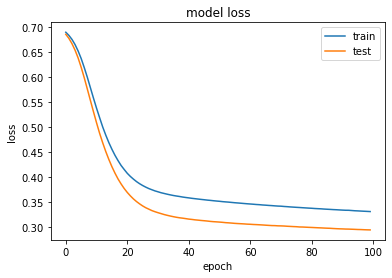

In [1544]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Произведем прогноз на тестовой выборке, задав порог = 0,35 (подобран в ходе экспериментов)

In [1566]:
# Predicting the Test set results
y_pred = cnn.predict(bas_X_test)
y_pred = (y_pred > 0.61)

In [1567]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 38   6]
 [ 13 143]]


In [1568]:
Accurary_rate = (143+38)/(200)
Accurary_rate

0.905

In [1569]:
Error_rate = (6+13)/(200)
Error_rate

0.095

In [1570]:
Se = 143/(143+13)
Se

0.9166666666666666

In [1571]:
Sp = 38/(38+6)
Sp

0.8636363636363636

# КЛАСТЕРИЗАЦИЯ

# K-Means Clustering

In [1689]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [1690]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported']).round()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
996,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


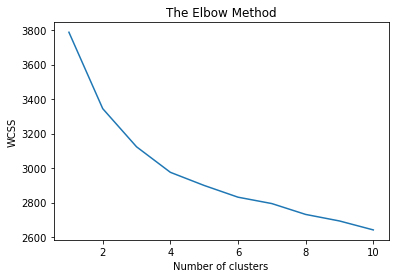

In [1691]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

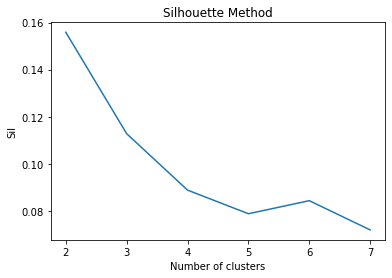

2:0.1558960399096853
3:0.1127699878473283
4:0.08878331596498931
5:0.07873745354773284
6:0.08428776767860532
7:0.07186037029104264


In [1692]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [1693]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported']).round()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [1698]:
# Less features
X = df[:, [5,10,15,24,26,29,30,31,32,33]]

In [1701]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['policy_annual_premium','insured_hobbies','collision_type','witnesses',
                                              'total_claim_amount',
                                              'vehicle_claim', 'auto_make', 'auto_model','auto_year', 'fraud_reported']).round()

,policy_annual_premium,insured_hobbies,collision_type,witnesses,total_claim_amount,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# SOM

In [1742]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 20, X, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


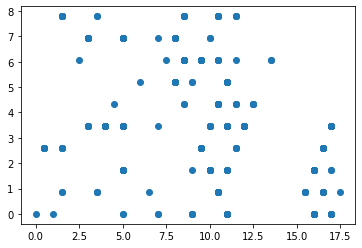

In [1739]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [1743]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [1744]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7580864292546114

# Hierarchical Clustering

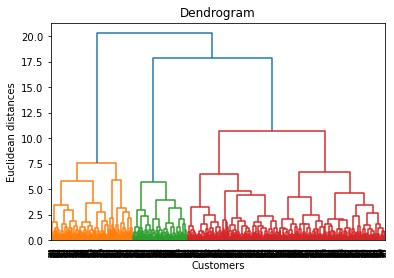

In [1745]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [1746]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [1747]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,kmeans.labels_)

0.6456685558729993

In [1748]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.8543623853497468